In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Command to tell Python to actually display the graphs
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\moham\\Downloads\\Great Learning\\Python Wk 3\\foodhub_order.csv")

In [5]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


In [21]:
# Getting to know the data.
df.shape 

(1898, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.000,NaN,NaN,NaN,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,NaN,NaN,NaN,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.000,NaN,NaN,NaN,16.499,7.484,4.470,12.080,14.140,22.297,35.410
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.000,NaN,NaN,NaN,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,NaN,NaN,NaN,24.162,4.973,15.000,20.000,25.000,28.000,33.000


In [13]:
# Checking for missing values in the data to see how I should handle them.
df.isnull().sum() 

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [15]:
ab= df['rating'].unique()
print(ab)

['Not given' '5' '3' '4']


In [17]:
# Looking at the summary statistics of the numerical data to get a better understanding of the data.
df.describe(include='all') 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1898.000,1898.000,1898,1898,1898.000,1898,1898,1898.000,1898.000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1477495.500,171168.478,NaN,NaN,16.499,NaN,NaN,27.372,24.162
std,548.050,113698.140,NaN,NaN,7.484,NaN,NaN,4.632,4.973
min,1476547.000,1311.000,NaN,NaN,4.470,NaN,NaN,20.000,15.000
25%,1477021.250,77787.750,NaN,NaN,12.080,NaN,NaN,23.000,20.000
50%,1477495.500,128600.000,NaN,NaN,14.140,NaN,NaN,27.000,25.000
75%,1477969.750,270525.000,NaN,NaN,22.297,NaN,NaN,31.000,28.000


In [19]:
df['rating'].value_counts() # looking at the count of each value we have in the data.

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [23]:
 # These are the EDA steps.
# checking unique order IDs
df['order_id'].nunique()

1898

In [25]:
# checking unique customer IDs
df['customer_id'].nunique()  

1200

In [27]:
# checking unique Restaurant Names
df['restaurant_name'].nunique()  

178

In [29]:
# Checking unique cuisine types
df['cuisine_type'].nunique()

14

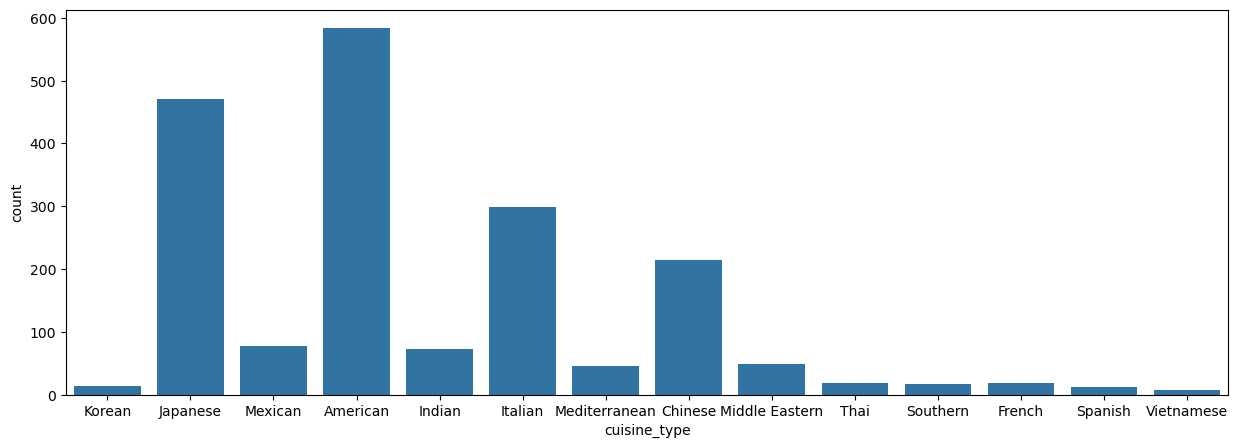

In [37]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Creating a countplot for cuisine type gain a better visualization about the data.
plt.show()

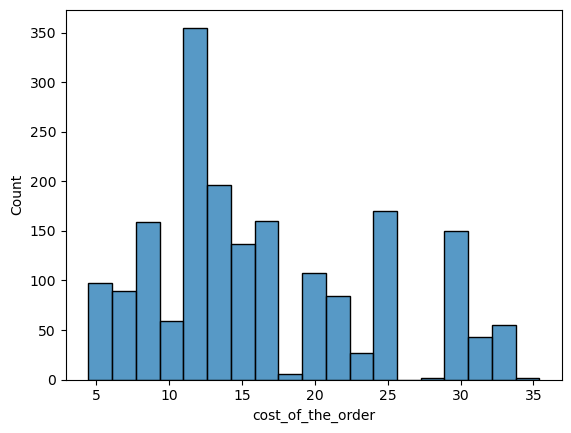

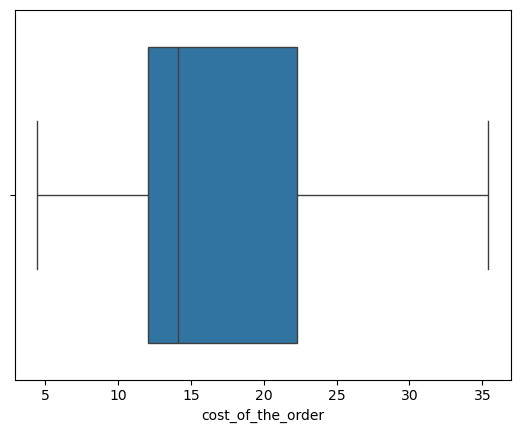

In [39]:
sns.histplot(data=df,x='cost_of_the_order') ## Creating a histogram for the cost of order to have a better understanding of the data.
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Creating Boxplot for the cost of order to see if there are any outliers. 
plt.show()

In [41]:
# # Checking the unique values for the day of the week column.
df['day_of_the_week'].unique() 

array(['Weekend', 'Weekday'], dtype=object)

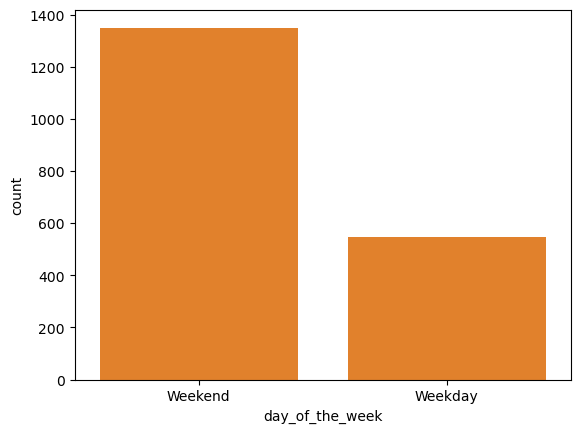

In [45]:
sns.countplot(data = df, x = 'day_of_the_week') ## Complete the code to plot a bar graph for 'day_of_the_week' column
plt.show()

# Most orders are placed on the weekends

In [47]:
# Check the unique values
df['rating'].unique() 

array(['Not given', '5', '3', '4'], dtype=object)

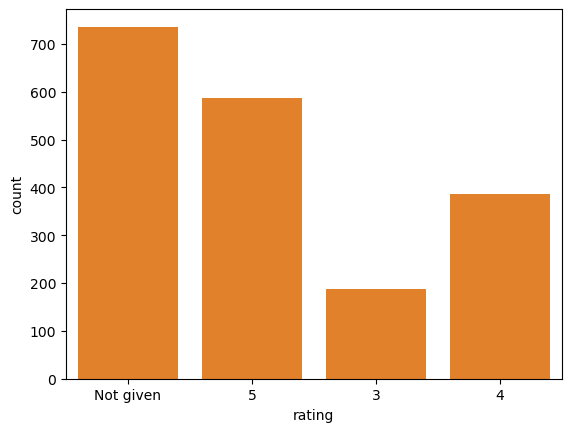

In [51]:
sns.countplot(data = df, x = 'rating')
plt.show()

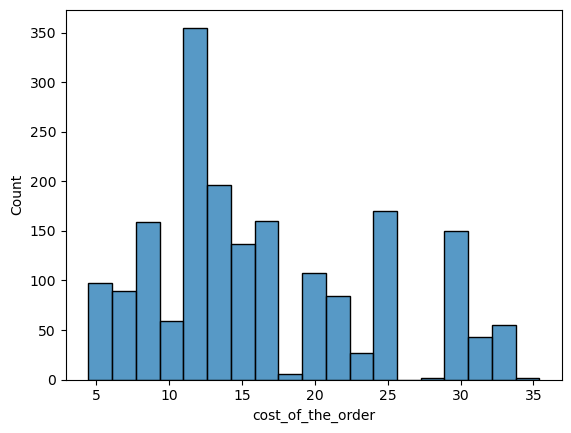

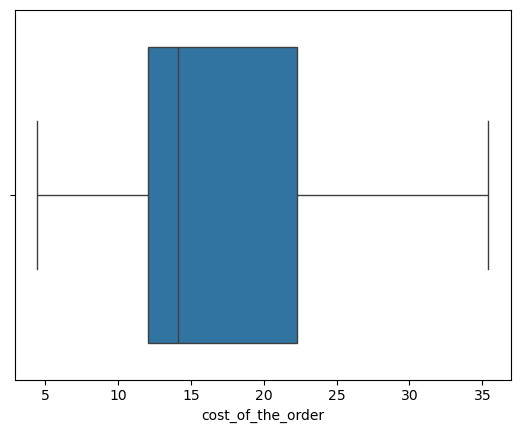

In [53]:
sns.histplot(data=df,x='cost_of_the_order') 
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') 
plt.show()

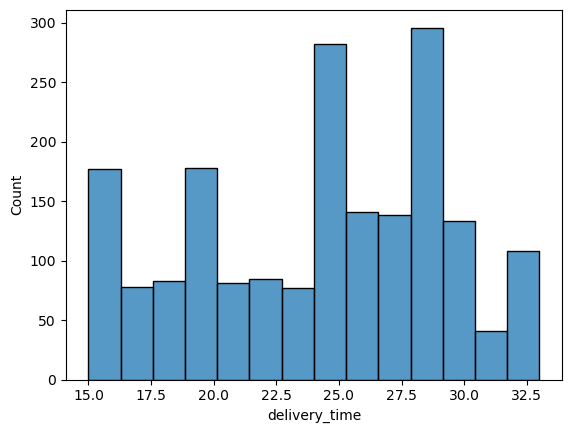

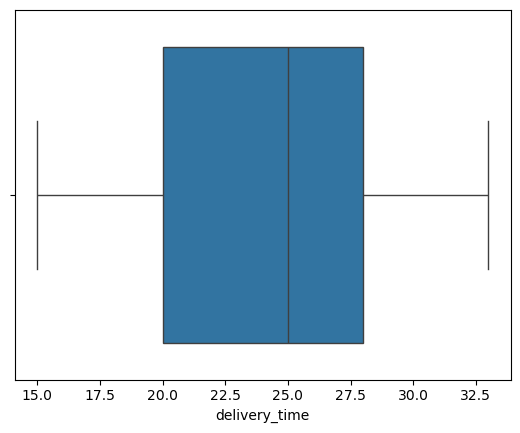

In [57]:
sns.histplot(data=df,x='delivery_time') 
plt.show()
sns.boxplot(data=df,x='delivery_time') 
plt.show()
# Insights
# Most orders are delivered within 20-27:30 minutes. 
# close to 300 orders take up to 28 minutes to be ready, 275 orders take 25 minutes, 175 orders take 16 minutes and 20 minutes respectively

In [59]:
# Getting the top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)
# This is self explanatory. Shake Shack receives the highest number of orders, followed by Meatball and Blue Ribbon Sushi. 

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

In [61]:
# Getting most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].unique() 

array(['Korean', 'Japanese', 'American', 'Italian', 'Mexican',
       'Mediterranean', 'Chinese', 'Indian', 'Thai', 'Southern', 'French',
       'Spanish', 'Middle Eastern', 'Vietnamese'], dtype=object)

In [63]:
# Getting orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] 

# Calculating the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculating the percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


In [65]:
# Getting the mean delivery time
mean_del_time = df['delivery_time'].mean() 

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


In [67]:
# Getting the counts of  each customer_id
df['customer_id'].value_counts().head(3)  

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

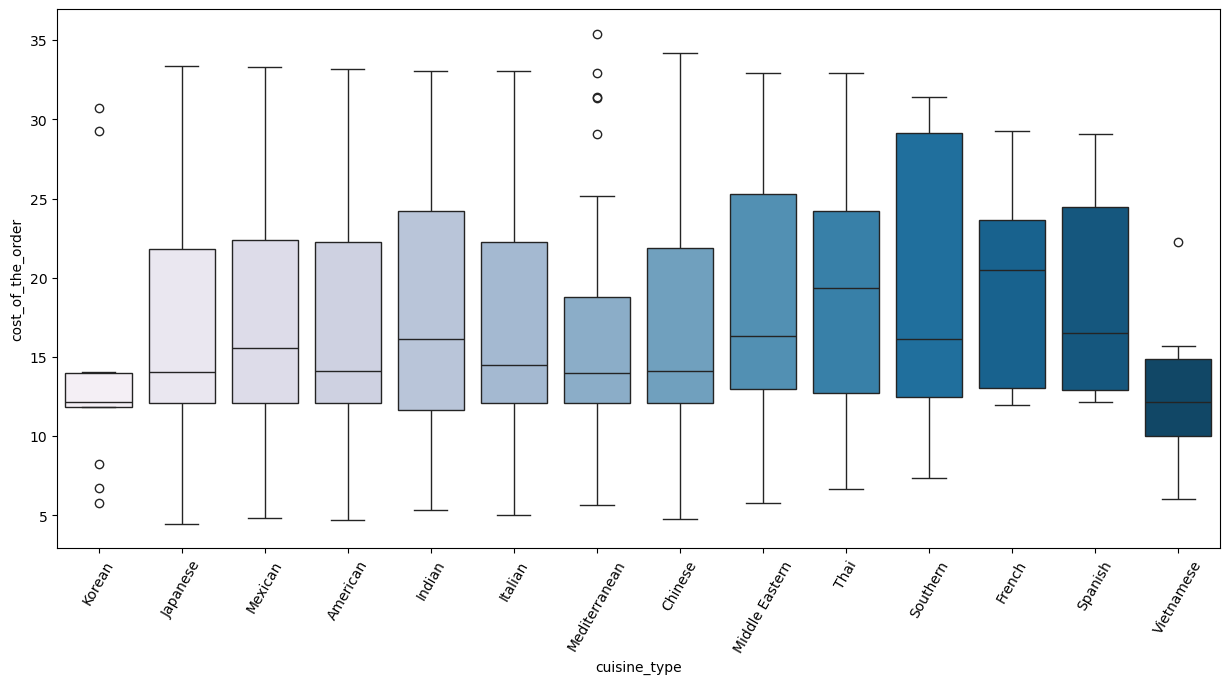

In [69]:
# Performing a multivariate analysis to explore relationships between the important variables in the dataset. 
# (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) 

# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

#Insights

# Southern cuisine seems to have the widest range of cost of the order
# Vietnames and Korean foods seem to be among the cheapest items. 
# Mediterranean food seems to have the most outliers, followed by Korean food when it comes to its cost. Needs investigation

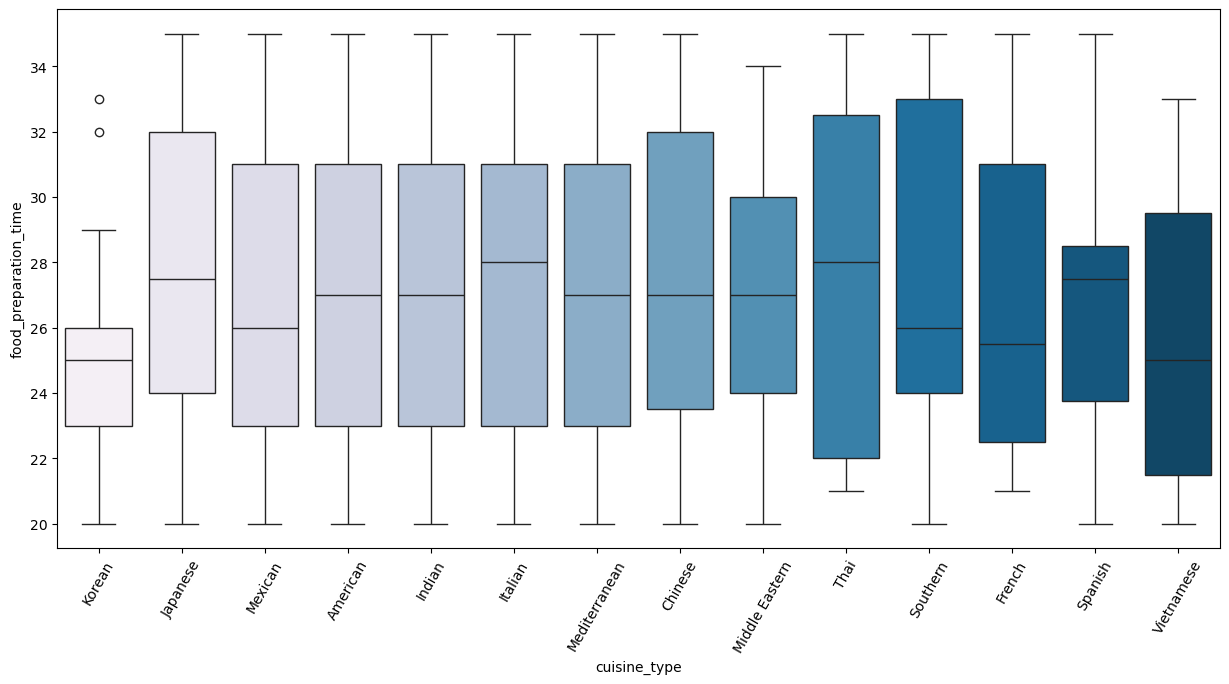

In [71]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu', hue = "cuisine_type")  
plt.show()

#Insights:

# Southern, Thai and Japanese foods take the longest time to become ready
# Korean and Spanish foods take the least time. Korean food has a couple of outliers. Needs to be investigated to check accuracy.

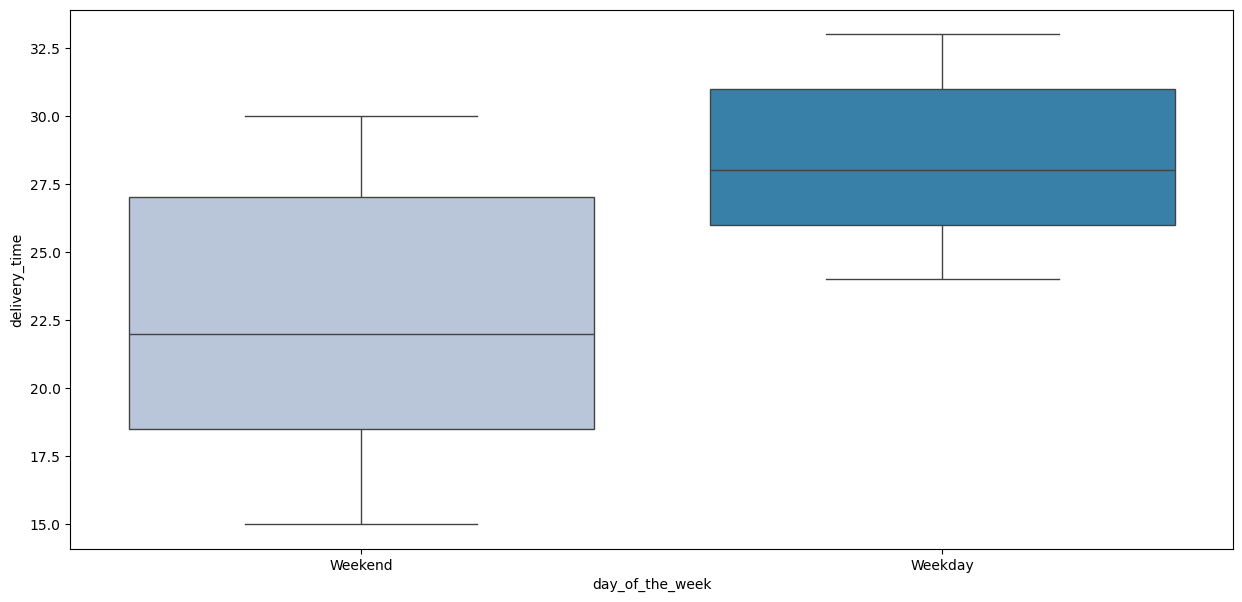

In [73]:
# Relationship between day of the week and delivery time   day_of_the_week  delivery_time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu', hue = "day_of_the_week")  
plt.show()

#Insight:

# Delivery time is fairly longer on weekdays than weekends. 

In [77]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

# Self explanatory: 

Shake Shack                     3579.530
The Meatball Shop               2145.210
Blue Ribbon Sushi               1903.950
Blue Ribbon Fried Chicken       1662.290

have the highest revenue. 

restaurant_name
Shake Shack                     3579.530
The Meatball Shop               2145.210
Blue Ribbon Sushi               1903.950
Blue Ribbon Fried Chicken       1662.290
Parm                            1112.760
RedFarm Broadway                 965.130
RedFarm Hudson                   921.210
TAO                              834.500
Han Dynasty                      755.290
Blue Ribbon Sushi Bar & Grill    666.620
Rubirosa                         660.450
Sushi of Gari 46                 640.870
Nobu Next Door                   623.670
Five Guys Burgers and Fries      506.470
Name: cost_of_the_order, dtype: float64

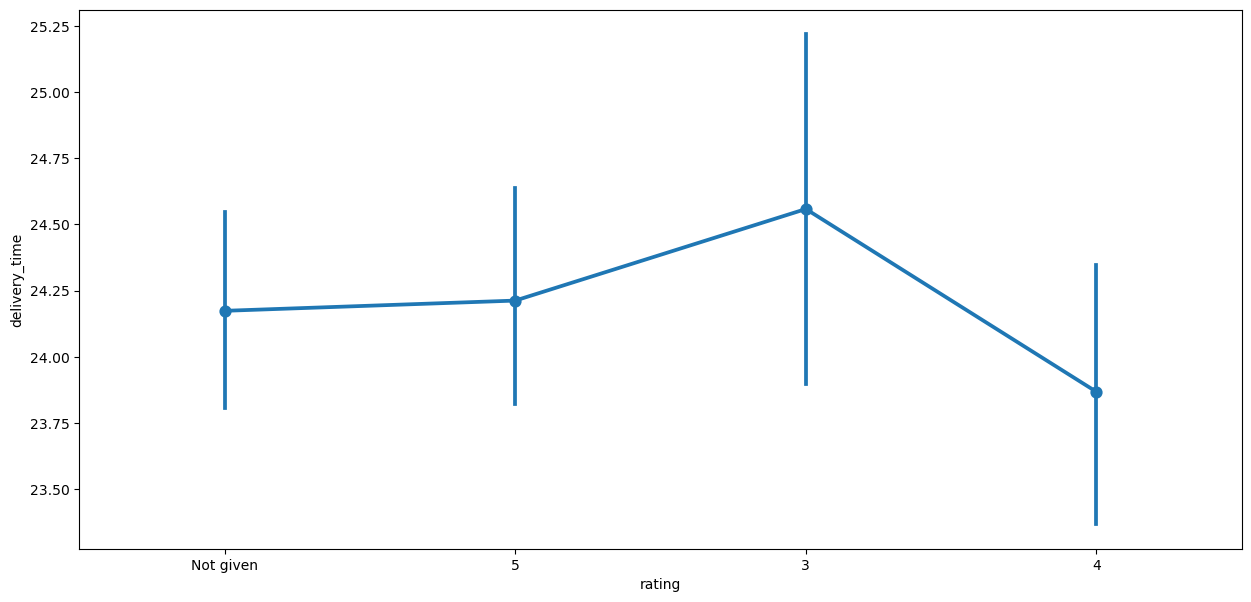

In [79]:
# Finding the relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

# the lower the delivery time the higher its rating. 

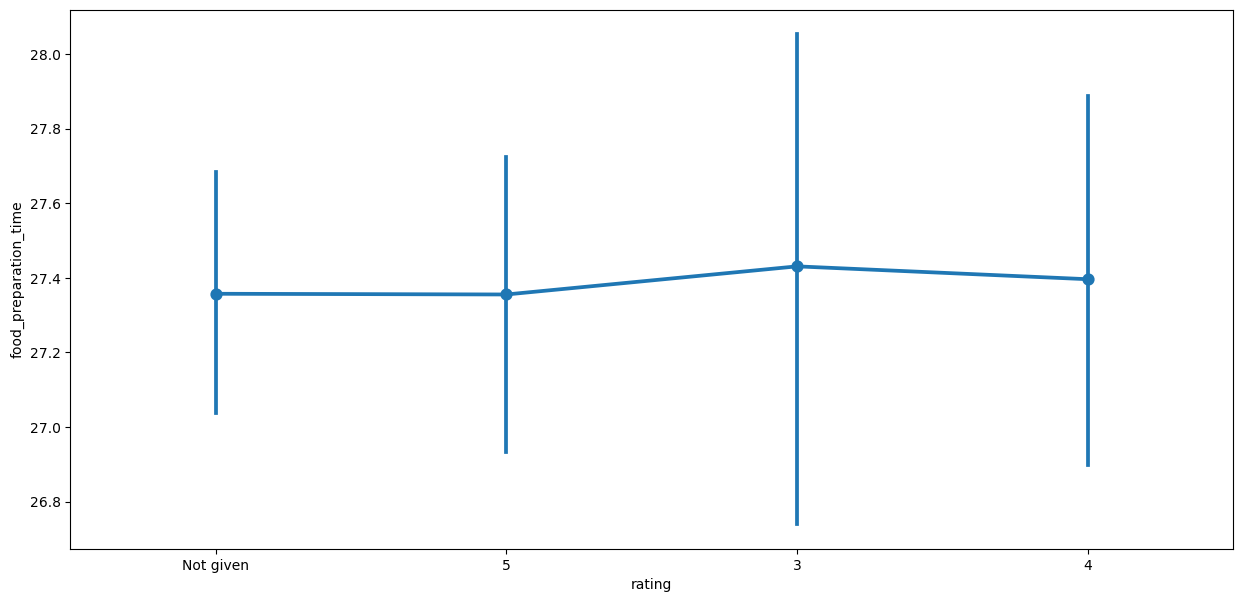

In [81]:
# Finding the relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  
plt.show()

# There is no relationship between food prep time and its rating. 

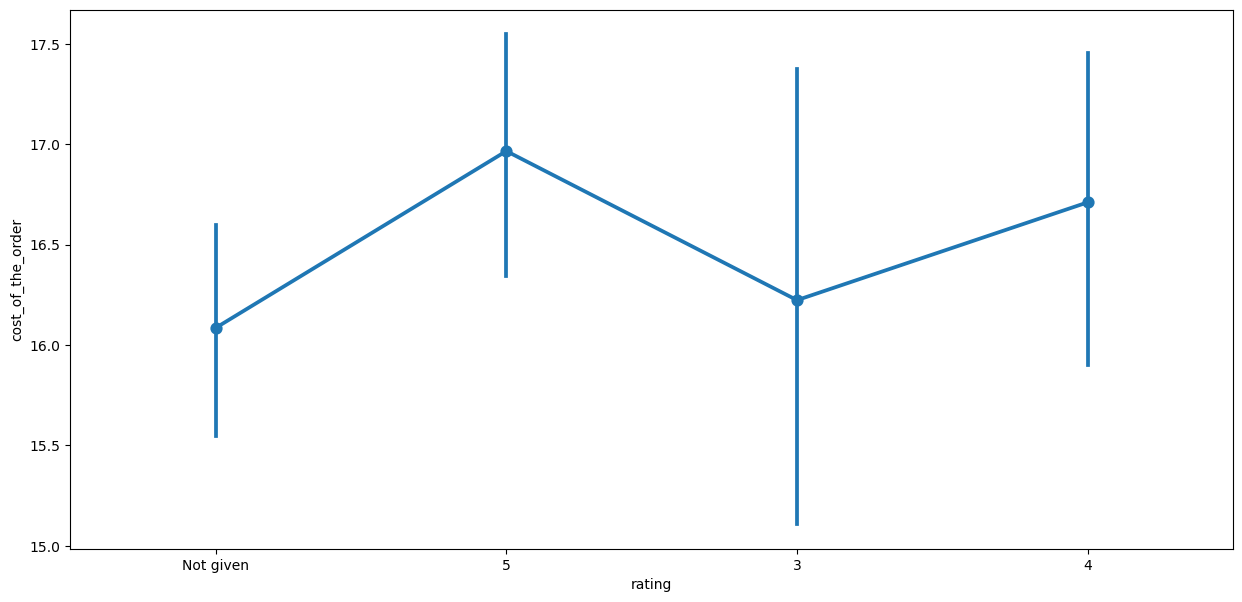

In [87]:
# Finding the relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x ='rating', y ='cost_of_the_order' , data = df)   

plt.show()

# The higher the cost of the rating the higher its rating. 

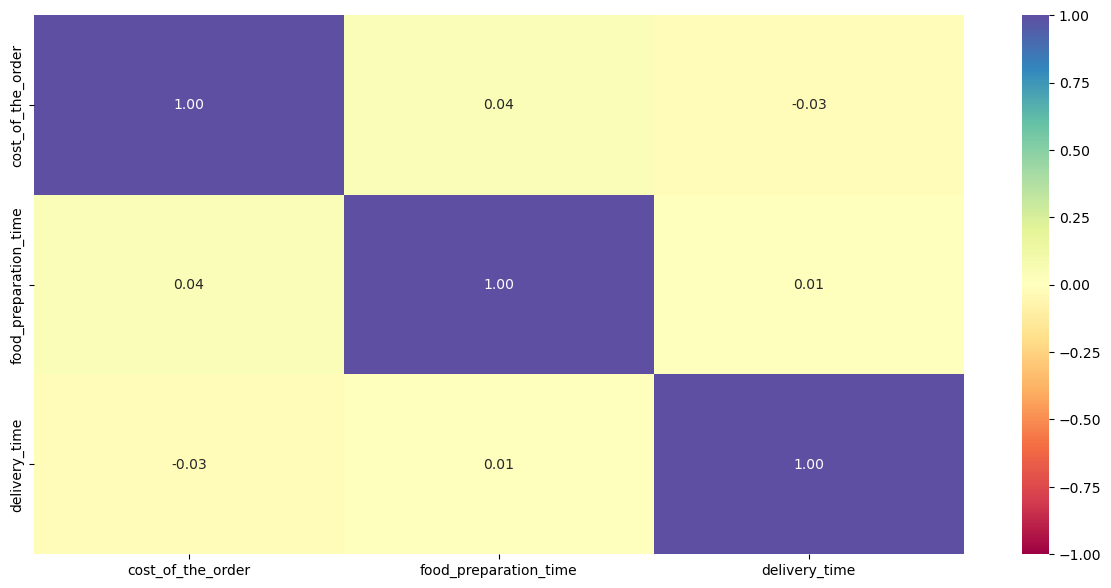

In [89]:
# Plotting the heatmap to find out if there is a relationship between metrics.
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [91]:
# Filterring the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Converting rating column from object to integer so that I can use the next formula.
df_rated['rating'] = df_rated['rating'].astype('int')

# Creating a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [95]:
# Getting the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] 

# Filtering the data to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Grouping the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 

# filtering for average rating greater than 4 to narrow my findings. 
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)  
df_avg_rating_greater_than_4



,restaurant_name,rating
0,The Meatball Shop,4.512
1,Blue Ribbon Fried Chicken,4.328
2,Shake Shack,4.278
3,Blue Ribbon Sushi,4.219


In [97]:
# creating a function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) 
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,7.688
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,1.812
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,1.835
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,7.300
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,1.738


In [99]:
# getting the total revenue and printing it
total_rev = df['Revenue'].sum() 
print('The net revenue is around', round(total_rev, 2), 'dollars.')

The net revenue is around 6166.3 dollars.


In [101]:
# Calculating the total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

## Writing the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
df_greater_than_60 = df[df['total_time']>60]

percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

# Print the percentage
print("Percentage of orders taking more than 60 minutes to get delivered:", round(percentage, 2), '%')

Percentage of orders taking more than 60 minutes to get delivered: 10.54 %


In [103]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it

print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')




The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekdays is around 22 minutes


In [ ]:
## Observations:

# American, Japanese, Italian, Chinese are the most popular food items
# Orders costing $12, 25 and 13 are the most popular items
# Most orders are placed on the weekends, close to 1380 orders!
# Shake Shack receives the highest number of orders, followed by Meatball and Blue Ribbon Sushi.
# French cuisine seems to have the widest range of cost of the order
# Vietnames and Korean foods seem to be among the cheapest items.
# Southern, Thai and Japanese foods take the longest time to become ready
# Korean and Spanish foods take the least time. 
# the lower the delivery time the higher its rating.
# There is no relationship between food prep time and its rating.

## Recommendations:

# More than 700 pple have not rated their orders and close to 600 and 400 have rated 5 and 4. We need to find a way to make the rating process more user friendly.
# # Mediterranean food seems to have the most outliers, followed by Korean food when it comes to its cost. Needs investigation.
# Korean and Spanish foods take the least time. Korean food has a couple of outliers. Needs to be investigated to check accuracy.
# Percentage of orders taking more than 60 minutes to get delivered: 10.54 %. We definitely need to find a way to reduce this time because it would help to increase ratings. 
